In [130]:
# Menghubungkan ke Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Impor library yang diperlukan
import os
#  Library ini digunakan untuk berinteraksi dengan sistem operasi, seperti mengakses file dan direktori.
import cv2
# Library ini adalah OpenCV (Open Source Computer Vision Library) yang digunakan untuk pemrosesan gambar dan komputerisasi penglihatan.
import numpy as np
#  Library ini menyediakan dukungan untuk array dan operasi matematika 
import pandas as pd
# Library ini digunakan untuk manipulasi dan analisis data.
from sklearn.model_selection import train_test_split
#  Fungsi ini digunakan untuk membagi dataset menjadi data latih dan data uji.
from sklearn.svm import SVC
#  Library ini menyediakan Support Vector Machine (SVM), yang digunakan untuk klasifikasi dan regresi.
from sklearn.metrics import accuracy_score
# Fungsi ini digunakan untuk menghitung akurasi dari model klasifikasi.
from sklearn.preprocessing import LabelEncoder
# Class ini digunakan untuk mengubah label kelas menjadi angka.
from sklearn.preprocessing import StandardScaler
# Class ini digunakan untuk penskalaan fitur agar memiliki mean 0 dan variansi 1.
import tensorflow as tf
# Library ini adalah framework machine learning yang digunakan untuk membangun dan melatih model jaringan saraf.
from tensorflow.keras.models import Sequential
# Class ini digunakan untuk membuat model sequential dalam TensorFlow.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Flatten = mengubah output layer menjadi array id
import joblib
# Class ini digunakan untuk membuat model sequential dalam TensorFlow.
from PIL import Image
# Modul ini menyediakan kelas Image dan fungsi-fungsi terkait untuk membuka, memanipulasi, dan menyimpan berbagai format gambar.
import random
# Library ini digunakan untuk menghasilkan angka acak atau mengacak elemen dalam suatu list atau array.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Path dataset pada Google Drive
# yang didalmnya berisi folder foto bunga yang diambil dari dataset "flower recognition" 
# Dataset Flower Recognition dari Kaggle adalah kumpulan data yang digunakan untuk tujuan pengenalan dan klasifikasi bunga berdasarkan gambar.
dataset_path = '/content/drive/MyDrive/Uas Computer Vision/project/data/flowers'

# Mendapatkan daftar gambar dan label
# buat variabel array kosong untuk menampung path dan label foto
image_paths = []
labels = []
# # Loop melalui setiap folder dalam dataset_path
for folder_name in os.listdir(dataset_path):
    folder_path = os.path.join(dataset_path, folder_name)
    #  Memeriksa apakah folder_path adalah direktori
    if os.path.isdir(folder_path):
          # Loop melalui setiap file gambar dalam folder_path
        for image_name in os.listdir(folder_path):
            image_path = os.path.join(folder_path, image_name)
             # Menambahkan image_path ke dalam list image_paths
            image_paths.append(image_path)
               # Menambahkan folder_name sebagai label ke dalam list labels
            labels.append(folder_name)

# Membaca dan memproses gambar
images = []
#  Loop melalui setiap image_path dalam list image_paths
for image_path in image_paths:
    image = cv2.imread(image_path)  # Mengubah ukuran gambar menjadi 64x64 piksel menggunakan OpenCV
    image = cv2.resize(image, (64, 64))  # Mengubah ukuran gambar menjadi 64x64 piksel
    images.append(image)   # Menambahkan gambar yang sudah diubah ukurannya ke dalam list images

# pengumpulan data image dan label sama
print(len(images))
print(len(labels))

In [125]:

# Konversi label ke nilai numerik
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Normalisasi gambar
# digunakan untuk mengubah list images menjadi array numpy dengan tipe data float32 dan melakukan normalisasi terhadap nilai pikselnya.
images = np.array(images, dtype='float32') / 255.0

# Pembagian data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(5, activation='softmax')  # Menggunakan 5 kelas bunga
])
# Dengan menggunakan kode di atas, model CNN (Convolutional Neural Network) telah didefinisikan dengan arsitektur yang telah dijelaskan. 
# Model ini dapat digunakan untuk melatih dan melakukan prediksi pada dataset klasifikasi bunga.


In [126]:
# Kompilasi model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Baris ini digunakan untuk mengkompilasi model CNN yang telah didefinisikan sebelumnya. 

# Pelatihan model CNN
model.fit(X_train, y_train, epochs=10, batch_size=32)
# Baris ini digunakan untuk melatih model CNN dengan menggunakan data pelatihan 

# Ekstraksi fitur menggunakan model CNN
features_train = model.predict(X_train)
features_test = model.predict(X_test)
# Baris ini digunakan untuk melakukan ekstraksi fitur menggunakan model CNN. Dengan memanggil metode predict

# Melakukan penskalaan fitur
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
# Penskalaan fitur dilakukan untuk memastikan bahwa semua fitur memiliki skala yang serupa

# Melatih model SVM
svm_model = SVC(kernel='linear')
svm_model.fit(features_train, y_train)
# Melatih model SVM menggunakan fitur-fitur hasil ekstraksi dari model CNN (features_train) dan label data pelatihan (y_train)
# Model SVM dengan kernel linear

Epoch 1/10
108/108 [==============================] - 25s 217ms/step - loss: 1.2770 - accuracy: 0.4480
Epoch 2/10
108/108 [==============================] - 23s 212ms/step - loss: 1.0545 - accuracy: 0.5838
Epoch 3/10
108/108 [==============================] - 21s 191ms/step - loss: 0.9518 - accuracy: 0.6322
Epoch 4/10
108/108 [==============================] - 23s 213ms/step - loss: 0.8126 - accuracy: 0.7006
Epoch 5/10
108/108 [==============================] - 21s 191ms/step - loss: 0.6823 - accuracy: 0.7518
Epoch 6/10
108/108 [==============================] - 23s 216ms/step - loss: 0.5544 - accuracy: 0.7996
Epoch 7/10
108/108 [==============================] - 21s 192ms/step - loss: 0.4011 - accuracy: 0.8639
Epoch 8/10
108/108 [==============================] - 22s 207ms/step - loss: 0.3007 - accuracy: 0.8992
Epoch 9/10
108/108 [==============================] - 21s 197ms/step - loss: 0.1947 - accuracy: 0.9470
Epoch 10/10
27/27 [==============================] - 1s 47ms/step


SVC(kernel='linear')

In [127]:
# Memprediksi label untuk data uji
y_pred = svm_model.predict(features_test)

# Menghitung akurasi prediksi
accuracy = accuracy_score(y_test, y_pred)
# Selanjutnya, kita menghitung akurasi prediksi dengan membandingkan label asli dari data uji (y_test) dengan label yang diprediksi (y_pred). 

# Akurasi dihitung menggunakan fungsi accuracy_score dari library scikit-learn.
print("Akurasi: {:.2f}%".format(accuracy * 100))


Akurasi: 62.85%


In [129]:
# Simpan model SVM ke dalam file
svm_model_path = '/content/drive/MyDrive/Uas Computer Vision/project/data/flowers/svm_model.pkl'
joblib.dump(svm_model, svm_model_path)
#  menyimpan model SVM yang telah dilatih ke dalam sebuah file menggunakan fungsi joblib.dump()

# Simpan label encoder ke dalam file
label_encoder_path = '/content/drive/MyDrive/Uas Computer Vision/project/data/flowers/label_encoder.pkl'
joblib.dump(label_encoder, label_encoder_path)
# kita juga menyimpan label encoder ke dalam sebuah file menggunakan fungsi joblib.dump()

['/content/drive/MyDrive/Uas Computer Vision/project/data/flowers/label_encoder.pkl']

1/1 [==============================] - 0s 60ms/step


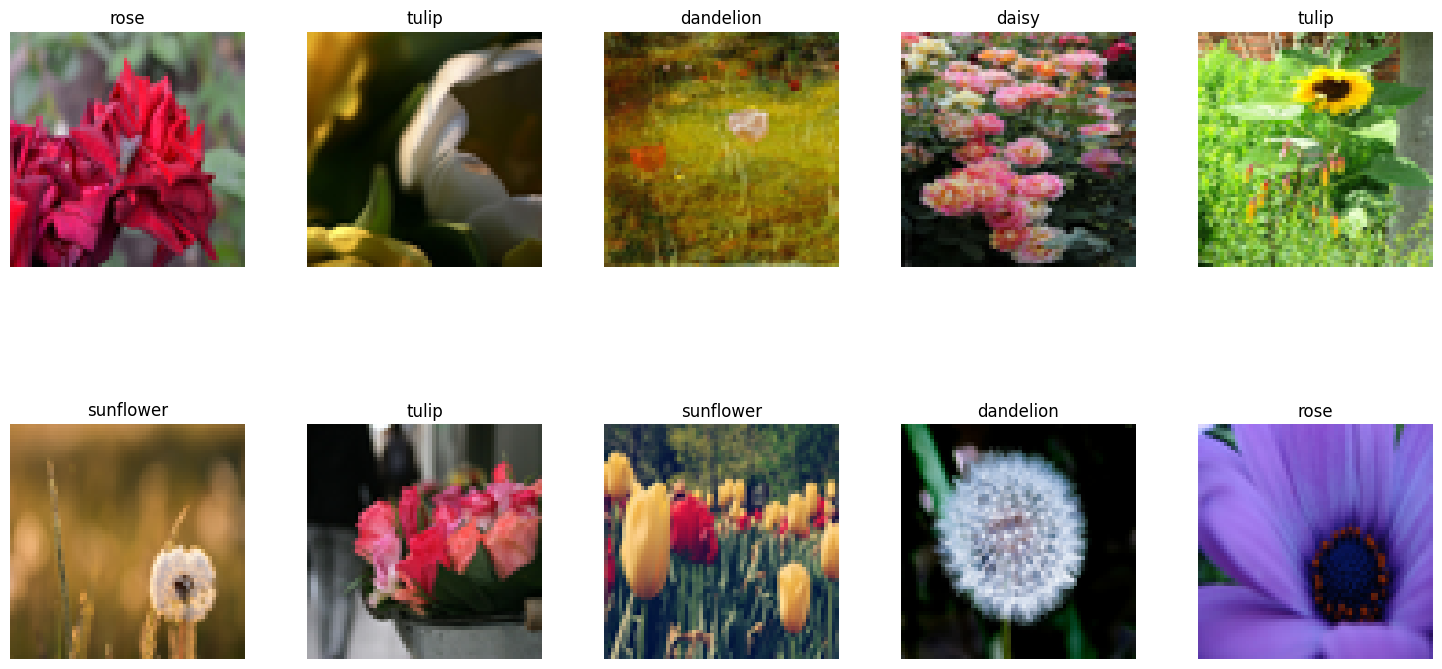

In [128]:
# Contoh penggunaan model yang telah disimpan
# Load model SVM dan label encoder
svm_model_path = '/content/drive/MyDrive/Uas Computer Vision/project/data/flowers/svm_model.pkl'
svm_model = joblib.load(svm_model_path)
label_encoder = joblib.load(label_encoder_path)

# Membaca dan memproses gambar yang akan diprediksi secara acak
# Membatasi jumlah data yang akan diprediksi menjadi 10
image_paths = random.sample(image_paths, 10)

# Membaca dan memproses gambar yang akan diprediksi
images = []
for image_path in image_paths:
    image = Image.open(image_path)
    image = image.resize((64, 64))  # Mengubah ukuran gambar menjadi 64x64 piksel
    image_array = np.array(image, dtype='float32') / 255.0
    images.append(image_array)

# Mengubah gambar menjadi array numpy
images = np.array(images)

# Ekstraksi fitur menggunakan model CNN
features = model.predict(images)

# Melakukan penskalaan fitur menggunakan skalar yang sesuai
scaler = StandardScaler()
features = scaler.fit_transform(features)

# Memprediksi label menggunakan model SVM
predicted_labels = svm_model.predict(features)

# Mendapatkan label kelas yang sesuai
predicted_labels = label_encoder.inverse_transform(predicted_labels)

# Menampilkan hasil prediksi
fig, axs = plt.subplots(2, 5, figsize=(15, 8))
fig.tight_layout()

for i in range(len(image_paths)):
    row = i // 5
    col = i % 5

    axs[row, col].imshow(images[i])
    axs[row, col].axis('off')
    axs[row, col].set_title(predicted_labels[i], fontsize=12)
    axs[row, col].set_xticks([])
    axs[row, col].set_yticks([]) 

plt.show()

